# Creating a Power Spectrum

The purpose of this script is to produce a power spectrum of an image. More information can be found at: https://bertvandenbroucke.netlify.app/2019/05/24/computing-a-power-spectrum-in-python/
Note: This script is specific for the image specified.

In [1]:
# Libraries
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.stats as stats

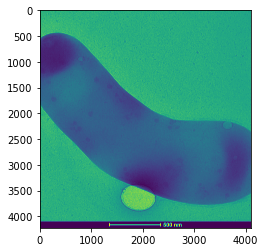

In [2]:
# Reading in image
image = mpimg.imread("prokaryote_party.tif")

# Displaying image
plt.imshow(image)
plt.show()

In [3]:
# Determining shape of image
np.shape(image)

(4224, 4096)

In [4]:
# Cropping image to make a SQUARE

# Converting image to array
image_arr = np.array(image)

# Crop image
image_arr = image_arr[0:4096, 0:4096]
  
# Convert array to image
#image_cropped = Image.fromarray(image_arr)

In [5]:
# Displaying shape of array
np.shape(image_arr)

(4096, 4096)

In [6]:
# Number of pixels
npix = image_arr.shape[0]
npix

4096

In [7]:
# Fourier Transform
fourier_arr = np.fft.fftn(image_arr)
fourier_amplitudes = np.abs(fourier_arr)**2

In [8]:
# Constructing a Wave Vector
# What is the wave vector corresponding to an element with indices i and j in the return array?
kfreq = np.fft.fftfreq(npix) * npix

# Convert to 2D
kfreq2D = np.meshgrid(kfreq, kfreq)

# Normalize wave vectors
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

# Flatten wave vectors since not needed
knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

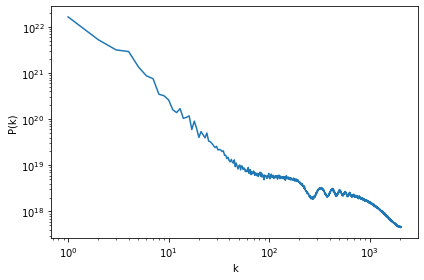

In [9]:
# Creating Power Spectrum
# Creating bins (contains start and endpoints)
kbins = np.arange(0.5, npix//2+1, 1.)

# Determining midpoints of bins
kvals = 0.5 * (kbins[1:] + kbins[:-1])

# Computing mean of Fourier amplitudes
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)

# Power calculation (Multilpy bin length by surface area in each bin)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

# Plotting
plt.loglog(kvals, Abins) # Double logarithm scale
plt.xlabel("k") # Wave number
plt.ylabel("P(k)") # Power
plt.tight_layout() # Adjusts padding around displayed plot